<a href="https://colab.research.google.com/github/WanderingVector/Iowa-Liquor-Sales/blob/main/Iowa_Liquor_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'iowa-liquor-sales-405513' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=iowa-liquor-sales-405513:US:bquxjob_7ed91357_18be46f5c69)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7ed91357_18be46f5c69') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` 



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7ed91357_18be46f5c69') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-19519900011,2019-05-22,5144,SAM'S CLUB 6979 / ANKENY,4625 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581273 41.691),77,POLK,...,89197,JOSE CUERVO ESPECIAL REPOSADO,12,1000,13.00,19.50,360,7020.00,360.0,95.10
1,S08889400059,2012-11-12,4109,BEST TRIP,1516 SE 1ST,DES MOINES,50315,POINT(-93.613469 41.575929),77,POLK,...,86883,SOUTHERN COMFORT,48,200,2.50,3.76,2,7.52,0.4,0.11
2,INV-14906100036,2018-10-08,5482,IOWA MINI MART,234 W 3RD ST,DAVENPORT,52801,POINT(-90.576054 41.522413),82,SCOTT,...,33466,ABSOLUT LIME MINI,10,600,5.88,8.82,4,35.28,2.4,0.63
3,INV-08700900001,2017-11-16,3456,QUICK SHOP / CLEAR LAKE,904 N 8TH ST,CLEAR LAKE,50428,POINT(-93.378772 43.142868),17,CERRO GORDO,...,36307,HAWKEYE VODKA,12,1000,4.05,6.08,60,364.80,60.0,15.85
4,INV-01979600003,2016-12-06,5023,HAWKEYE CONVENIENCE STORES / 16TH AV,250 16TH AVE SW,CEDAR RAPIDS,52404,POINT(-91.667665 41.961645),57,LINN,...,35913,FIVE O'CLOCK VODKA,48,200,1.13,1.70,96,163.20,19.2,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711023,INV-01682800088,2016-11-18,4291,FAREWAY STORES #597 / CRESTON,105 E ADAMS ST,CRESTON,50801,POINT(-94.237509 40.715722),88,UNION,...,5347,JOHNNIE WALKER RED LABEL SCOTCH,12,1000,17.10,25.65,2,51.30,2.0,0.53
27711024,S32168700038,2016-05-05,5220,LIQUOR TOBACCO & GROCERY / MASON CIT,"2771, 4TH ST SW",MASON CITY,50401,POINT(-93.241914 43.148282),None,None,...,45277,PARAMOUNT WHITE RUM,12,1000,4.42,6.63,2,13.26,2.0,0.53
27711025,S09182000085,2012-11-27,3700,AVOCA LIQUOR,158 SOUTH ELM,AVOCA,51521,POINT(-95.339412 41.476306),78,POTTAWATTAMIE,...,65257,JAGERMEISTER LIQUEUR,12,1000,15.53,23.30,2,46.60,2.0,0.53
27711026,S30376400005,2016-01-26,4899,GRAETTINGER MARKET,"124, W ROBINS ST",GRAETTINGER,51342,POINT(-94.750949 43.237678),74,PALO ALTO,...,41707,PHILLIPS LIME FLAVORED VODKA,12,1000,5.78,8.67,2,17.34,2.0,0.53


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,27711028.0,27711028.0,2.771102e+07,2.771102e+07,27711028.0,2.771102e+07,2.771103e+07,2.771103e+07
mean,12.155566,881.964761,1.054191e+01,1.582339e+01,10.766961,1.438071e+02,9.161458e+00,2.417599e+00
std,7.746083,629.341013,1.199210e+01,1.798681e+01,30.258566,5.059222e+02,3.600398e+01,9.511347e+00
min,1.0,0.0,0.000000e+00,0.000000e+00,-648.0,-9.720000e+03,-6.480000e+02,-1.711800e+02
25%,6.0,750.0,5.540000e+00,8.400000e+00,3.0,3.450000e+01,1.500000e+00,4.000000e-01
50%,12.0,750.0,8.330000e+00,1.251000e+01,6.0,7.650000e+01,4.800000e+00,1.260000e+00
75%,12.0,1000.0,1.296000e+01,1.944000e+01,12.0,1.485600e+02,1.050000e+01,2.770000e+00
max,336.0,378000.0,1.843600e+04,2.765400e+04,15000.0,2.795573e+05,1.500000e+04,3.962580e+03


## The above describes the summary statistics of numeric dataframe , by calculating some statistical data like percentile, mean and standard deviation of the numerical values of the dataframe.

In [5]:
df=results

In [6]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [7]:
# Display the first few rows of the DataFrame
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-19519900011,2019-05-22,5144,SAM'S CLUB 6979 / ANKENY,4625 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581273 41.691),77,POLK,...,89197,JOSE CUERVO ESPECIAL REPOSADO,12,1000,13.00,19.50,360,7020.00,360.0,95.10
1,S08889400059,2012-11-12,4109,BEST TRIP,1516 SE 1ST,DES MOINES,50315,POINT(-93.613469 41.575929),77,POLK,...,86883,SOUTHERN COMFORT,48,200,2.50,3.76,2,7.52,0.4,0.11
2,INV-14906100036,2018-10-08,5482,IOWA MINI MART,234 W 3RD ST,DAVENPORT,52801,POINT(-90.576054 41.522413),82,SCOTT,...,33466,ABSOLUT LIME MINI,10,600,5.88,8.82,4,35.28,2.4,0.63
3,INV-08700900001,2017-11-16,3456,QUICK SHOP / CLEAR LAKE,904 N 8TH ST,CLEAR LAKE,50428,POINT(-93.378772 43.142868),17,CERRO GORDO,...,36307,HAWKEYE VODKA,12,1000,4.05,6.08,60,364.80,60.0,15.85
4,INV-01979600003,2016-12-06,5023,HAWKEYE CONVENIENCE STORES / 16TH AV,250 16TH AVE SW,CEDAR RAPIDS,52404,POINT(-91.667665 41.961645),57,LINN,...,35913,FIVE O'CLOCK VODKA,48,200,1.13,1.70,96,163.20,19.2,5.07


## DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

### Perform Data Preparation and Cleaning
### Load dataset into dataframe using Pandas
### Explore number of columns, rows, ranges of values
### Handle missing, incorrect and invalid data
### Perform any additional additional steps
### Load dataset into dataframe using Pandas

In [8]:
# List of columns in the dataset
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [9]:
# Column information
df.info

<bound method DataFrame.info of          invoice_and_item_number        date store_number  \
0                INV-19519900011  2019-05-22         5144   
1                   S08889400059  2012-11-12         4109   
2                INV-14906100036  2018-10-08         5482   
3                INV-08700900001  2017-11-16         3456   
4                INV-01979600003  2016-12-06         5023   
...                          ...         ...          ...   
27711023         INV-01682800088  2016-11-18         4291   
27711024            S32168700038  2016-05-05         5220   
27711025            S09182000085  2012-11-27         3700   
27711026            S30376400005  2016-01-26         4899   
27711027         INV-11066900044  2018-03-22         2595   

                                    store_name               address  \
0                     SAM'S CLUB 6979 / ANKENY  4625 SE DELAWARE AVE   
1                                    BEST TRIP           1516 SE 1ST   
2                  

# Wrangle the dataset- Handle missing, incorrect and invalid data

In [10]:
# Percentage missing values per column
missing_percentages = df.isna().sum() .sort_values(ascending=False) / len(df) * 100
missing_percentages

county_number              12.912495
store_location              9.014440
county                      0.576998
zip_code                    0.300083
address                     0.299845
city                        0.299841
category_name               0.090361
category                    0.061254
sale_dollars                0.000036
state_bottle_retail         0.000036
state_bottle_cost           0.000036
vendor_number               0.000032
vendor_name                 0.000025
bottle_volume_ml            0.000000
volume_sold_liters          0.000000
bottles_sold                0.000000
invoice_and_item_number     0.000000
pack                        0.000000
item_description            0.000000
item_number                 0.000000
date                        0.000000
store_name                  0.000000
store_number                0.000000
volume_sold_gallons         0.000000
dtype: float64

## The above shows the percentage of missing values per column.

In [11]:
# Return missing value percentages not equal to zero
missing_percentages[missing_percentages != 0]

county_number          12.912495
store_location          9.014440
county                  0.576998
zip_code                0.300083
address                 0.299845
city                    0.299841
category_name           0.090361
category                0.061254
sale_dollars            0.000036
state_bottle_retail     0.000036
state_bottle_cost       0.000036
vendor_number           0.000032
vendor_name             0.000025
dtype: float64

## The above returns missing value percentage of columns that are not equal to 0.

Let’s remove missing values

In [12]:
# Keep the datafram with valid entries in the same variable.
df.dropna(inplace=True)
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-19519900011,2019-05-22,5144,SAM'S CLUB 6979 / ANKENY,4625 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581273 41.691),77,POLK,...,89197,JOSE CUERVO ESPECIAL REPOSADO,12,1000,13.00,19.50,360,7020.00,360.0,95.10
1,S08889400059,2012-11-12,4109,BEST TRIP,1516 SE 1ST,DES MOINES,50315,POINT(-93.613469 41.575929),77,POLK,...,86883,SOUTHERN COMFORT,48,200,2.50,3.76,2,7.52,0.4,0.11
2,INV-14906100036,2018-10-08,5482,IOWA MINI MART,234 W 3RD ST,DAVENPORT,52801,POINT(-90.576054 41.522413),82,SCOTT,...,33466,ABSOLUT LIME MINI,10,600,5.88,8.82,4,35.28,2.4,0.63
3,INV-08700900001,2017-11-16,3456,QUICK SHOP / CLEAR LAKE,904 N 8TH ST,CLEAR LAKE,50428,POINT(-93.378772 43.142868),17,CERRO GORDO,...,36307,HAWKEYE VODKA,12,1000,4.05,6.08,60,364.80,60.0,15.85
4,INV-01979600003,2016-12-06,5023,HAWKEYE CONVENIENCE STORES / 16TH AV,250 16TH AVE SW,CEDAR RAPIDS,52404,POINT(-91.667665 41.961645),57,LINN,...,35913,FIVE O'CLOCK VODKA,48,200,1.13,1.70,96,163.20,19.2,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711022,S07004400049,2012-08-08,4593,THE CUE LIQUORS,1404 MAIN ST,ROCK VALLEY,51247,POINT(-96.294873 43.204363),84,SIOUX,...,69637,DR. MCGILLICUDDY'S CHERRY SCHNAPPS,12,1000,11.00,16.50,2,33.00,2.0,0.53
27711023,INV-01682800088,2016-11-18,4291,FAREWAY STORES #597 / CRESTON,105 E ADAMS ST,CRESTON,50801,POINT(-94.237509 40.715722),88,UNION,...,5347,JOHNNIE WALKER RED LABEL SCOTCH,12,1000,17.10,25.65,2,51.30,2.0,0.53
27711025,S09182000085,2012-11-27,3700,AVOCA LIQUOR,158 SOUTH ELM,AVOCA,51521,POINT(-95.339412 41.476306),78,POTTAWATTAMIE,...,65257,JAGERMEISTER LIQUEUR,12,1000,15.53,23.30,2,46.60,2.0,0.53
27711026,S30376400005,2016-01-26,4899,GRAETTINGER MARKET,"124, W ROBINS ST",GRAETTINGER,51342,POINT(-94.750949 43.237678),74,PALO ALTO,...,41707,PHILLIPS LIME FLAVORED VODKA,12,1000,5.78,8.67,2,17.34,2.0,0.53


In [13]:
missing_percentages = df.isna().sum() .sort_values(ascending=False) / len(df) * 100
missing_percentages

invoice_and_item_number    0.0
date                       0.0
volume_sold_liters         0.0
sale_dollars               0.0
bottles_sold               0.0
state_bottle_retail        0.0
state_bottle_cost          0.0
bottle_volume_ml           0.0
pack                       0.0
item_description           0.0
item_number                0.0
vendor_name                0.0
vendor_number              0.0
category_name              0.0
category                   0.0
county                     0.0
county_number              0.0
store_location             0.0
zip_code                   0.0
city                       0.0
address                    0.0
store_name                 0.0
store_number               0.0
volume_sold_gallons        0.0
dtype: float64

## Columns and rows with missing values has been dropped, keeping only dataframes with valid entries. There are no more missing values.

The columns with the dollar sign have been renamed.

Let’s remove dollar sign from the following columns; Sales(Dollars), State Bottle Cost and State Bottle Retail.

We need to view the data types of those 3 columns

In [14]:
# Rename multiple column names by label
df.rename(columns={'sale_dollars':'Sales', 'state_bottle_cost': 'State Bottle Cost', 'state_bottle_retail': 'State Bottle Retail', 'county_number' :'County Id',' vendor_name': 'Vendor', 'state_bottle_cost': 'State Bottle Cost', 'bottles_sold' : 'Bottles Sold', 'store_name':'Store Name'}, inplace=True)
print(df.columns)

Index(['invoice_and_item_number', 'date', 'store_number', 'Store Name',
       'address', 'city', 'zip_code', 'store_location', 'County Id', 'county',
       'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sales',
       'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')


In [15]:
df.Sales.head()

0    7020.00
1       7.52
2      35.28
3     364.80
4     163.20
Name: Sales, dtype: float64

In [16]:
# View datatype
df.dtypes
# All 3 coloumns are in float type with no $ signs

invoice_and_item_number     object
date                        dbdate
store_number                object
Store Name                  object
address                     object
city                        object
zip_code                    object
store_location              object
County Id                   object
county                      object
category                    object
category_name               object
vendor_number               object
vendor_name                 object
item_number                 object
item_description            object
pack                         Int64
bottle_volume_ml             Int64
State Bottle Cost          float64
State Bottle Retail        float64
Bottles Sold                 Int64
Sales                      float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

#Parse date to datetime, to enable extraction

In [17]:
# Parse date column to Datetime
df.date = pd.to_datetime(df.date)
df.date

0          2019-05-22
1          2012-11-12
2          2018-10-08
3          2017-11-16
4          2016-12-06
              ...    
27711022   2012-08-08
27711023   2016-11-18
27711025   2012-11-27
27711026   2016-01-26
27711027   2018-03-22
Name: date, Length: 21801451, dtype: datetime64[ns]

# **# Date column is now datetime6**4

In [28]:
# Grouping year-month
df['year_month'] = df['date'].dt.to_period('M')  # Create a new column with year-month
df_grouped = df.groupby('year_month').agg({'Profit': 'sum', 'Sales': 'sum', 'Bottles Sold': 'sum'}).reset_index()

# Display the grouped DataFrame
print(df_grouped)


    year_month      Profit        Sales  Bottles Sold
0      2012-01   602312.03  14552551.99       1186847
1      2012-02   640643.45  16554079.91       1325811
2      2012-03   658242.04  16566634.70       1327107
3      2012-04   683418.88  18235759.60       1442766
4      2012-05   796635.28  20167711.39       1614928
..         ...         ...          ...           ...
122    2022-03   972164.80  27447811.44       1988607
123    2022-04  1118109.69  31653643.83       2326293
124    2022-05  1159457.27  32918864.32       2391022
125    2022-06  1303162.60  35494599.18       2558875
126    2022-07   594071.70  15763884.31       1119701

[127 rows x 4 columns]


# Numerical Analysis and Visualization

# Compute mean and standard deviation

*The following numeric columns will be analyzed;

Sales

State Bottle Cost

State Bottle Retail


In [19]:
# Compute mean of sales column
df.Sales.mean()

141.18014586093386

## To define correlation, you need mean, standard deviation and sample co-variance.

In [20]:
# Compute standard deviation of sales column
df.Sales.std()

501.52260394481925

## The standard deviation is calculated as the square root of variance by determining each data point’s deviation relative to the mean.

In [21]:
# Compute mean of state bottle cost column
df['State Bottle Cost'].mean()

10.21551537326575

In [22]:
# Compute standard deviation of state bottle cost column
df['State Bottle Cost'].std()

10.82222536651944

In [23]:
# Compute mean of state bottle retail column
df['State Bottle Retail'].mean()

15.335415527617862

In [24]:
# Compute the standard deviation of state bottle retail column
df['State Bottle Retail'].std()

16.232534592422745

# Let’s create a new column ‘Profit’

In [25]:
# Create column for profit

df['State Bottle Cost'] = pd.to_numeric(df['State Bottle Cost'], errors='coerce')
df['State Bottle Retail'] = pd.to_numeric(df['State Bottle Retail'], errors='coerce')

# Create a new column 'Profit'
df['Profit'] = df['State Bottle Retail'] - df['State Bottle Cost']

# Display the DataFrame with the new 'Profit' column
df.head()


,invoice_and_item_number,date,store_number,Store Name,address,city,zip_code,store_location,County Id,county,...,pack,bottle_volume_ml,State Bottle Cost,State Bottle Retail,Bottles Sold,Sales,volume_sold_liters,volume_sold_gallons,year_month,Profit
0,INV-19519900011,2019-05-22,5144,SAM'S CLUB 6979 / ANKENY,4625 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581273 41.691),77,POLK,...,12,1000,13.00,19.50,360,7020.00,360.0,95.10,2019-05,6.50
1,S08889400059,2012-11-12,4109,BEST TRIP,1516 SE 1ST,DES MOINES,50315,POINT(-93.613469 41.575929),77,POLK,...,48,200,2.50,3.76,2,7.52,0.4,0.11,2012-11,1.26
2,INV-14906100036,2018-10-08,5482,IOWA MINI MART,234 W 3RD ST,DAVENPORT,52801,POINT(-90.576054 41.522413),82,SCOTT,...,10,600,5.88,8.82,4,35.28,2.4,0.63,2018-10,2.94
3,INV-08700900001,2017-11-16,3456,QUICK SHOP / CLEAR LAKE,904 N 8TH ST,CLEAR LAKE,50428,POINT(-93.378772 43.142868),17,CERRO GORDO,...,12,1000,4.05,6.08,60,364.80,60.0,15.85,2017-11,2.03
4,INV-01979600003,2016-12-06,5023,HAWKEYE CONVENIENCE STORES / 16TH AV,250 16TH AVE SW,CEDAR RAPIDS,52404,POINT(-91.667665 41.961645),57,LINN,...,48,200,1.13,1.70,96,163.20,19.2,5.07,2016-12,0.57


In [26]:
# Derive Profit from ( Sales, State Bottle Cost, State Bottle Retail
df['Profit'] - df['Sales'] - df['State Bottle Cost']

0          -7026.50
1             -8.76
2            -38.22
3           -366.82
4           -163.76
             ...   
27711022     -38.50
27711023     -59.85
27711025     -54.36
27711026     -20.23
27711027     -25.34
Length: 21801451, dtype: float64

## Compute correlation between Sales and Profit

In [27]:
# Compute correlation between Sales and Profit
df['Sales'].corr(df['Profit'])

0.09994164986932992

# The correlation between the features Sales and Profit is around 0.999. The number is closer to 1, which means these two features are highly correlated.

# Explore relationship between columns

## The following columns will be explored;

State Bottle Cost

State Bottle Retail

Sales

Profit

*   Correlations
*  Scatterplots


*   Pair Plots
*  Categorical Plots



In [29]:
# Explore the relationship between columns
df_corr = df[['State Bottle Cost', 'State Bottle Retail', 'Sales', 'Profit']].corr()
df_corr


,State Bottle Cost,State Bottle Retail,Sales,Profit
State Bottle Cost,1.000000,0.999943,0.099898,0.999486
State Bottle Retail,0.999943,1.000000,0.099924,0.999772
Sales,0.099898,0.099924,1.000000,0.099942
Profit,0.999486,0.999772,0.099942,1.000000


<Axes: >

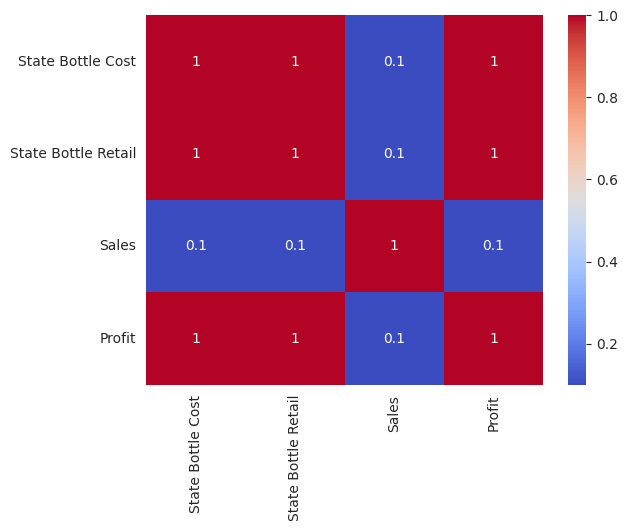

In [30]:
# Explore relationships with heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

# Insights:
### From the correlation heatmap, we can see that there is a positive correlation between Sales and Profit. In order words, as Sales increases Profit also increases.

# Positive Correlation

When two variables in a dataset increase or decrease together, then it is known as a positive correlation. A positive correlation is denoted by 1

<ipython-input-31-678ead874c7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


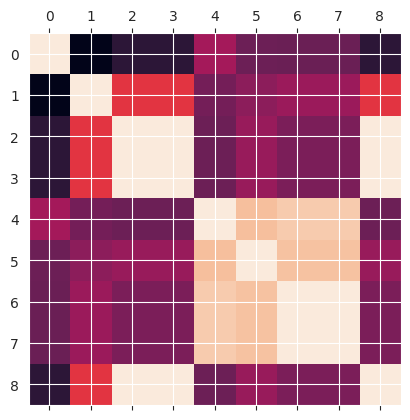

In [31]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png")

# This will save the image in the working directory.
#If you don't know what this directory is the next line will show you how to check

<ipython-input-32-57cc3f50b556>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.matshow(df_corr, fignum=f.number, cmap=plt.cm.get_cmap('YlOrRd', 3))  # Use 'YlOrRd' colormap for salmon, yellow, and red


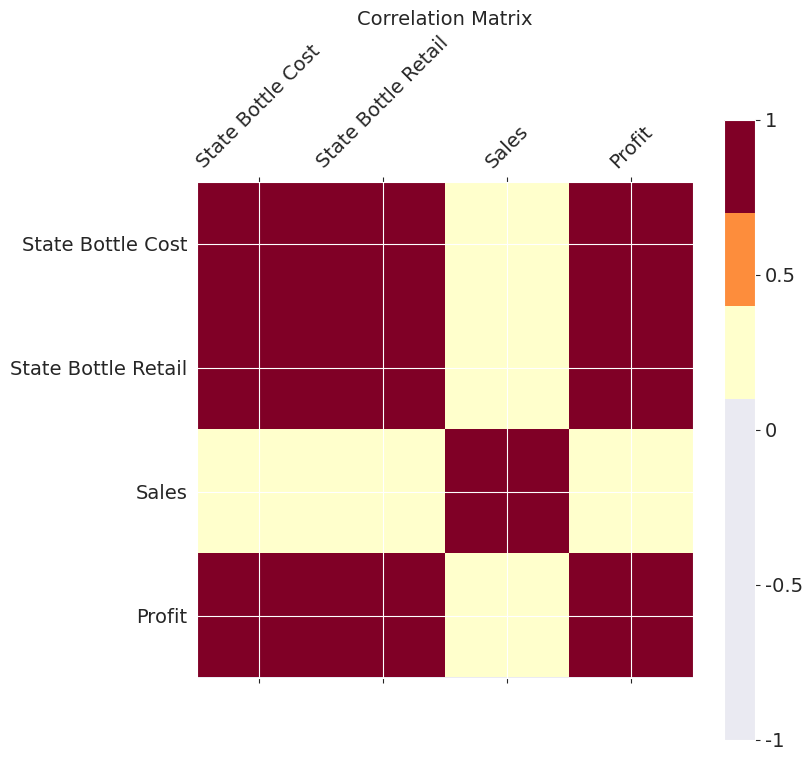

In [32]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_corr = df[['State Bottle Cost', 'State Bottle Retail', 'Sales', 'Profit']].corr()

# Set up the figure
f = plt.figure(figsize=(8, 8))

# Plot the heatmap with specified colors
plt.matshow(df_corr, fignum=f.number, cmap=plt.cm.get_cmap('YlOrRd', 3))  # Use 'YlOrRd' colormap for salmon, yellow, and red

# Add labels and ticks
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)

# Add colorbar with specified colors
cb = plt.colorbar()
cb.set_ticks([-1, -0.5, 0, 0.5, 1])  # Adjust ticks if needed
cb.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
cb.ax.tick_params(labelsize=14)

# Add title
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()


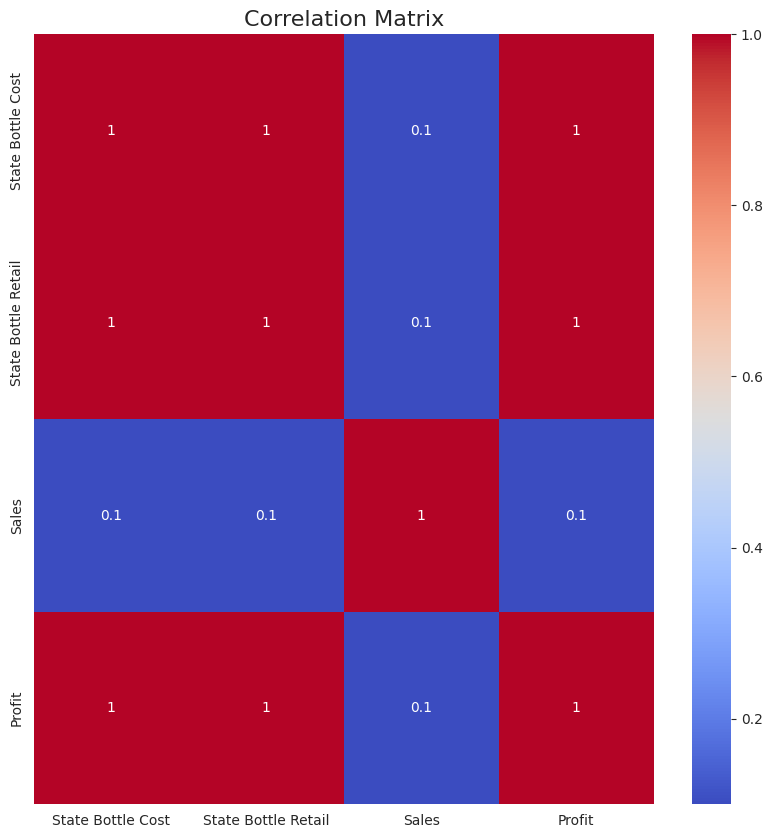

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_corr is your correlation DataFrame
# You may need to replace 'df_corr' with your actual DataFrame name

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df_corr, annot=True, ax=ax, cmap='coolwarm')

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()



# Scatterplots:

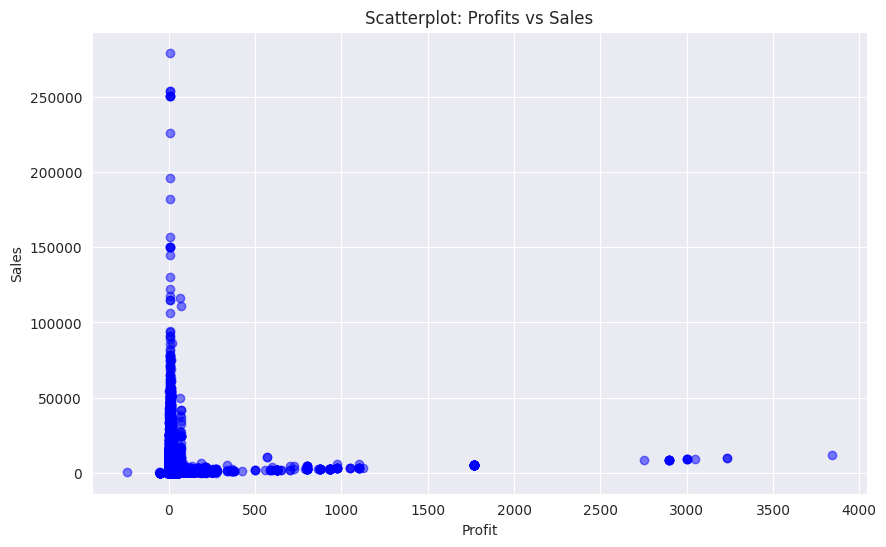

In [34]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Scatterplot for Profits and Sales
plt.scatter(df['Profit'], df['Sales'], alpha=0.5, color='blue')

# Set labels and title
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Scatterplot: Profits vs Sales')

# Show the plot
plt.show()

# Pair Plots of Profit and Sales

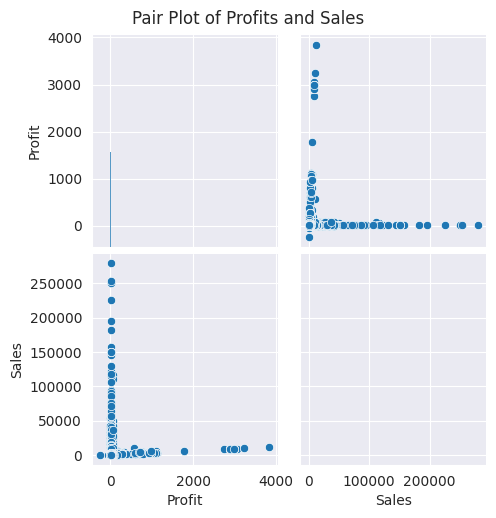

In [33]:
import seaborn as sns

sns.pairplot(df[['Profit', 'Sales']])
plt.suptitle('Pair Plot of Profits and Sales', y=1.02)
plt.show()


#Histogram of Sales
##To visualize the distribution of a single continuous variable.

## 1. How did sales evolve through the years?

<Axes: xlabel='date', ylabel='Count'>

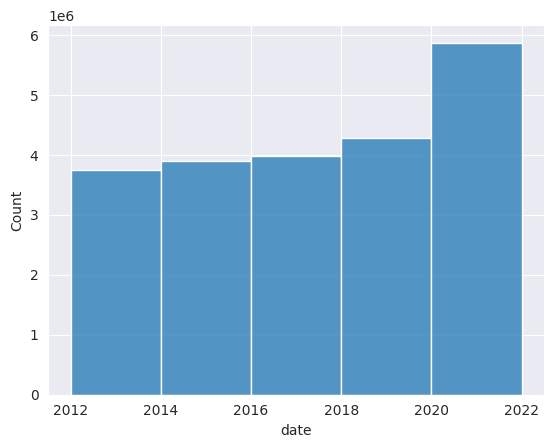

In [37]:
# Extract year-month from date coulmn and plot a histplot
import matplotlib.pyplot as plt

sns.histplot(df.date.dt.year, bins=5, kde=False)

# Histogram for Sales

## From this visual, it is clear that sales have increased drastically from 2020 to 2022

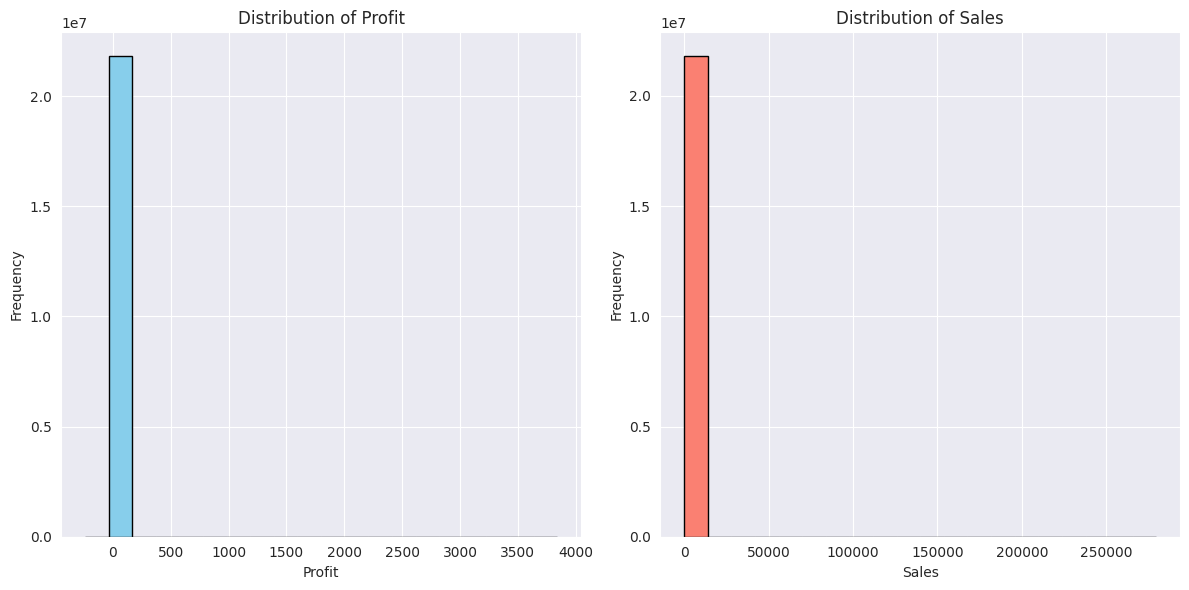

In [38]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Histogram for Profit
plt.subplot(1, 2, 1)
plt.hist(df['Profit'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Histogram for Sales
plt.subplot(1, 2, 2)
plt.hist(df['Sales'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# **Sales and Profit Correlation Hypothesis:**


# There is a significant correlation between sales and profit.

# Categorical Plots:

In [39]:
# Value Count
df.category_name.value_counts()

CANADIAN WHISKIES                 2105019
AMERICAN VODKAS                   1935636
STRAIGHT BOURBON WHISKIES         1341329
VODKA 80 PROOF                    1141917
SPICED RUM                        1092901
                                   ...   
IMPORTED GINS                          17
IMPORTED VODKA - CHERRY                14
IMPORTED WHISKIES                      12
AMERICAN WHISKIES                       1
DELISTED / SPECIAL ORDER ITEMS          1
Name: category_name, Length: 103, dtype: int64

## So now we will visualize the distribution of sales by top 10 Category Name

## 2. Which type of liquor has the highest sales?

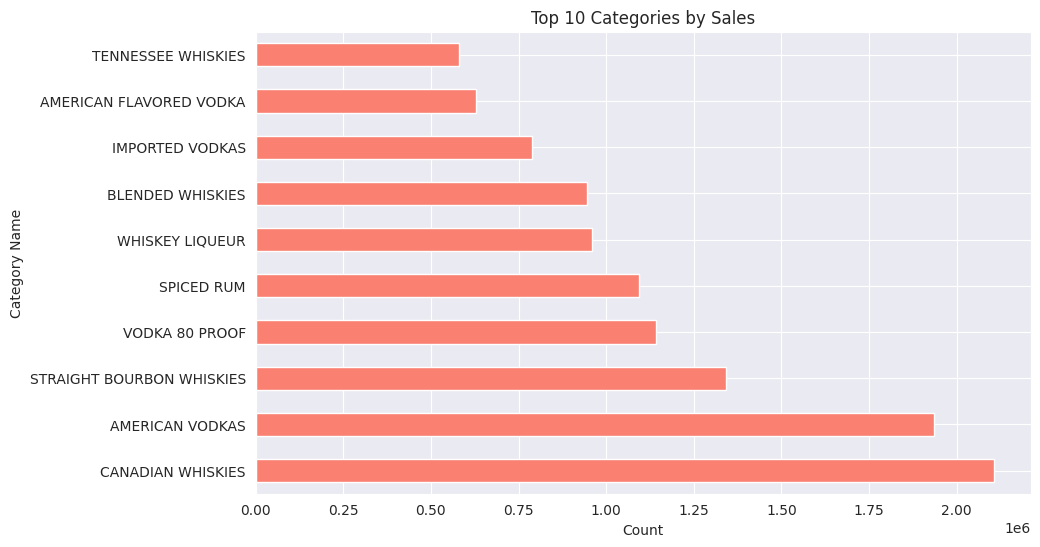

In [40]:
import matplotlib.pyplot as plt

# Sales distribution by top 10 category names
top_categories = df['category_name'].value_counts().head(10)

ax = top_categories.plot(kind='barh', figsize=(10, 6), color='salmon')
ax.set_title('Top 10 Categories by Sales')
ax.set_xlabel('Count')
ax.set_ylabel('Category Name')

plt.show()



#From the above visualization, we can see that Canadian Whiskies and American Vodkas are in the highest of sales

# Sales distribution per Vendor Name

In [41]:
# Value count
df.vendor_name.value_counts()

DIAGEO AMERICAS                3626824
JIM BEAM BRANDS                2033729
SAZERAC COMPANY  INC           1227645
HEAVEN HILL BRANDS             1109234
LUXCO INC                      1009412
                                ...   
SOVEREIGN BRANDS                     1
SAN BARTOLO FARMS INC.               1
MUTUAL WHOLESALE LIQUOR INC          1
BARREL HOUSE DISTILLING CO.          1
BULL RUN DISTILLERY LLC              1
Name: vendor_name, Length: 530, dtype: int64

#Top Liquor Brands

1.   Diageo Americas
2.   Jim Beam Brands
3.   Sazerac Company Inc.
4.   Heaven Hill Brands
5.   Luxco Inc.


#Distribution of sales based by top 10 Vendors

## 3. Which vendors hold the highest sales?

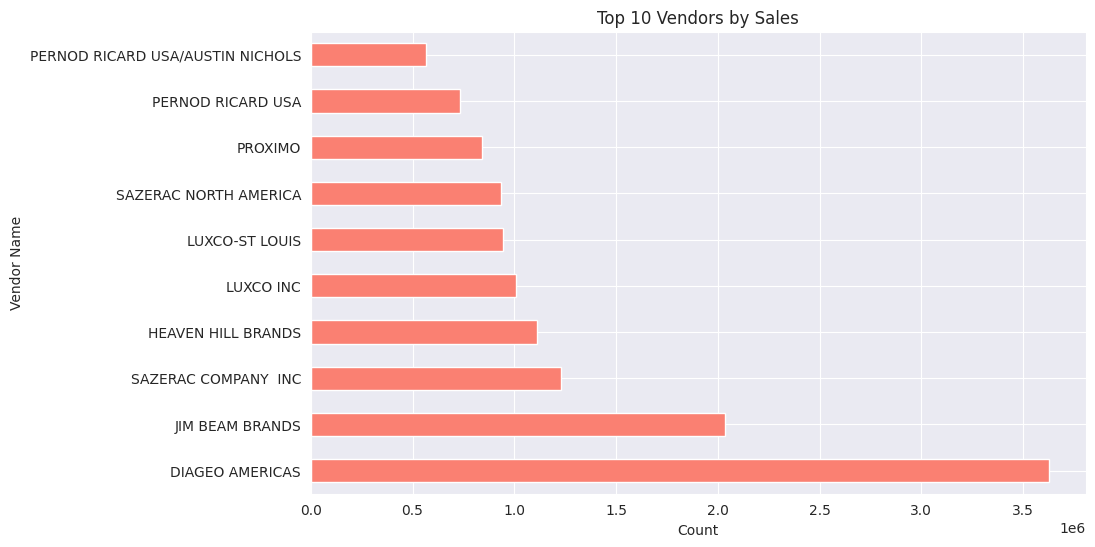

In [42]:
# Sales distribution by top 10 vendors
ax = df['vendor_name'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='salmon')
ax.set_title('Top 10 Vendors by Sales')
ax.set_xlabel('Count')
ax.set_ylabel('Vendor Name')

plt.show()

##We can see that liquor brands from Diageo Americas made the highest sales

# Sales distribution per Item_Description

In [43]:
# Value count
df.item_description.value_counts()

BLACK VELVET                          563051
HAWKEYE VODKA                         487018
FIVE O'CLOCK VODKA                    321433
FIREBALL CINNAMON WHISKEY             298691
TITOS HANDMADE VODKA                  264116
                                       ...  
BURNETT'S WHIPPED CREAM VODKA MINI         1
ADMIRAL NELSON  101 MINI                   1
DEL MAGUEY ESPADIN ESPECIAL                1
OP ANDERSON AQUAVIT                        1
BAILEY''S W/2 MUGS                         1
Name: item_description, Length: 10247, dtype: int64

#4. What are the top 5 selling items?

#Top 5 Sales

1. Black Velvet
2. Hawkeye Vodka
3. Five O'Clock Vodka
4. Fireball Cinnamon Whiskey
5. Titos Handmade Vodka

# Distribution of sales by top 10 Items

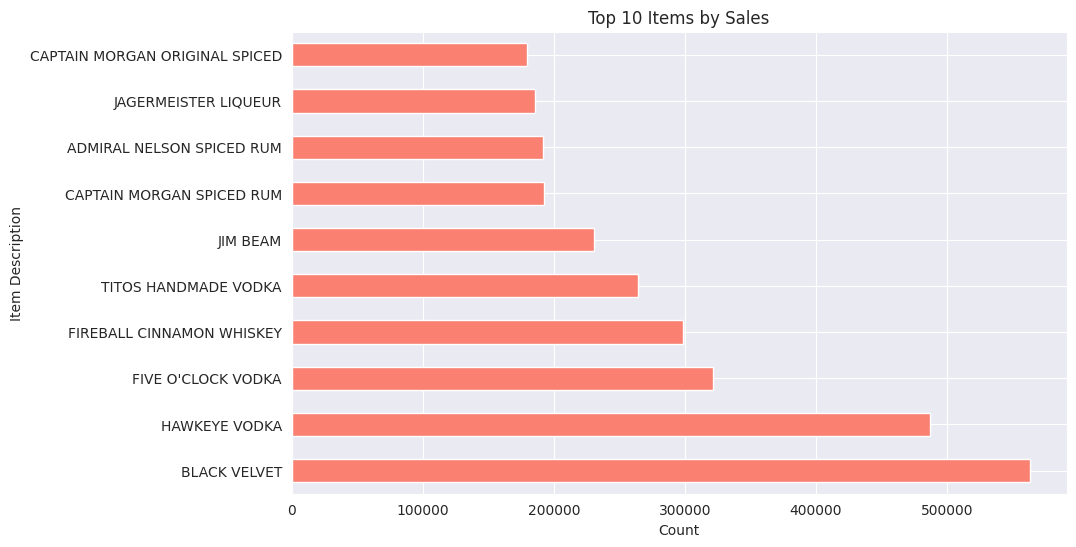

In [44]:
# Sales distribution by top 10 items
ax = df['item_description'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='salmon')
ax.set_title('Top 10 Items by Sales')
ax.set_xlabel('Count')
ax.set_ylabel('Item Description')

plt.show()

## We can see that Black Velvet made the stores the highest sales followed by Hawkeye Vodka.

#The item with the highest profit

In [45]:
# View item with highest profit
df.loc[df['Profit'].idxmax()]

invoice_and_item_number                                 INV-01159600001
date                                                2016-10-25 00:00:00
store_number                                                       2590
Store Name                          HY-VEE FOOD STORE #5 / CEDAR RAPIDS
address                                            3235 OAKLAND ROAD NE
city                                                       CEDAR RAPIDS
zip_code                                                          52402
store_location                              POINT(-91.658105 42.010971)
County Id                                                            57
county                                                             LINN
category                                                      1011200.0
category_name                                 STRAIGHT BOURBON WHISKIES
vendor_number                                                     125.0
vendor_name                                    CEDAR RIDGE VINEY

# 5. Which itme holds the highest profit?

#Highest Profit Item:
## Cedar Ridge Reserve Burbon Private Cask DNO

#6. Which item holds the lowest profit?

#Item with the Lowest Profit

In [46]:
# View item with the lowest profit
df.loc[df['Profit'].idxmin()]

invoice_and_item_number                      INV-36611800001
date                                     2021-05-13 00:00:00
store_number                                            2515
Store Name                 HY-VEE FOOD STORE #1 / MASON CITY
address                                       2400 4TH ST SW
city                                              MASON CITY
zip_code                                             50401.0
store_location                   POINT(-93.235588 43.148451)
County Id                                                 17
county                                           CERRO GORDO
category                                           1022200.0
category_name                             100% AGAVE TEQUILA
vendor_number                                          330.0
vendor_name                                   GEMINI SPIRITS
item_number                                           989235
item_description             CORAZON REPOSADO BUY THE BARREL
pack                    

#Lowest Profit Item:

## Corazon Reposado Buy the Barrel - 100% Agave Tequila

# 7. Which store made the highest profit?

## The store that made the highest profit

In [47]:
# Convert store name column to string data type
df['Store Name'] = df['Store Name'].astype(str)

# Find the store with the highest profit
highest_profit_row = df.loc[df['Profit'].idxmax()]
highest_profit_store = highest_profit_row['Store Name']
total_profit_for_store = highest_profit_row['Profit']

# Print the results
print(f"The store with the highest profit is: {highest_profit_store}")
print(f"The total profit for this store is: {total_profit_for_store}")


The store with the highest profit is: HY-VEE FOOD STORE #5 / CEDAR RAPIDS
The total profit for this store is: 3840.0


#The Highest Profit Store:


## *   HY-VEE FOOD STORE #5 in Cedar Rapids
## *   Positive gain of $3,840.00



In [48]:
# Convert store name column to string data type
df['Store Name'] = df['Store Name'].astype(str)

# Find the store with the lowest profit
lowest_profit_row = df.loc[df['Profit'].idxmin()]
lowest_profit_store = lowest_profit_row['Store Name']
total_profit_for_store = lowest_profit_row['Profit']

# Print the results
print(f"The store with the lowest profit is: {lowest_profit_store}")
print(f"The total profit for this store is: {total_profit_for_store}")


The store with the lowest profit is: HY-VEE FOOD STORE #1 / MASON CITY
The total profit for this store is: -241.82999999999998


# 8. Which store held the lowest profit?

##The Lowest Profit Store:

## *   HY-VEE FOOD STORE #1 in Mason City
## *   Negative loss of $242.00



# Store Location Impact Hypothesis:
# Geospatial Analysis

The location of a store impacts its profits

#Sales and Profit Correlation Hypothesis:
# Regression Analysis

There is a significant correlation between sales and profit.

#Bottle Volume Impact Hypothesis:
# Regression Analysis
The volume of bottles sold does not impact profit.

#Bottle Size vs Retail Cost Hypothesis:
# Regression Analysis
The retail cost remains consisten across differnt bottle sizes.

#Seasonal Trends in Sales:
#Time Series Analysis

The monthly liquor sales in Iowa exhibit a seasonal trend, with higher sales during certain months.  

#Charactristics of Liquor type and Demographic
#Clustering Analysis
The characteristics of liquor brands, such as bottle volume, cost, and location impact sales.


# ***6.3 Geospatial Analysis***

# 1. Install the libraries folium and JSON

In [35]:
pip install --upgrade google-cloud-bigquery

# 3. Import the libraries you needed analysis

In [51]:
pip install datapackage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10746 sha256=c7a49e7701deff2a95f5857ee43ad8169e781cd4c39d04e8a9e9d81a3ed3c1d7
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
  Cre

# 4. Datahub—country polygons as GeoJSON;

In [52]:
from datapackage import Package

package = Package('https://datahub.io/core/geo-countries/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'geo-countries_zip', 'countries']


# 7. Create a choropleth map using Store Location and Profits

***I will create this in Tableau****

In [ ]:
import statsmodels.api as sm

X = merged_df['']
X = sm.add_constant(X)
y = merged_df['total_pop']
model = sm.OLS(y, X).fit()
print(model.summary())

# 6.4 Machine Learning

Importing libraries and data

Data cleaning

Data prep for regression analysis


#Regression Model for Bottles Sold & Profit

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame
df['Bottles Sold'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Bottles Sold', 'Profit'])

# Independent and dependent variables
X = df[['Sales']]  # Independent variable
y = df['Profit']  # Dependent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 2.200e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:24:10   Log-Likelihood:            -6.7640e+07
No. Observations:            21801451   AIC:                         1.353e+08
Df Residuals:                21801449   BIC:                         1.353e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9676      0.001   4146.117      0.0

#Regresson Model for State Bottle Cost & State Bottle Retail

In [ ]:
import statsmodels.api as sm
import pandas as pd


# Select the independent variable (X) and dependent variable (y)
X = df[['State Bottle Cost']]  # Independent variable
y = df['State Bottle Retail']   # Dependent variable

# Add a constant term to the independent variable matrix (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     State Bottle Retail   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.909e+11
Date:                 Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                         03:29:17   Log-Likelihood:             7.2595e+06
No. Observations:             21801451   AIC:                        -1.452e+07
Df Residuals:                 21801449   BIC:                        -1.452e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0138

#Regression Model for Sales & Volume of Sold Gallons

In [ ]:
import statsmodels.api as sm
import pandas as pd


# Select the independent variable (X) and dependent variable (y)
X = df[['volume_sold_gallons']]  # Independent variable
y = df['Sales']                    # Dependent variable

# Add a constant term to the independent variable matrix (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 5.338e+07
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:47:18   Log-Likelihood:            -1.5299e+08
No. Observations:            21801451   AIC:                         3.060e+08
Df Residuals:                21801449   BIC:                         3.060e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.0764    

# 1. Importing libraries and data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
%matplotlib inline

In [38]:
from google.colab import auth
auth.authenticate_user()

#Missing Data Check


In [39]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

invoice_and_item_number    0
date                       0
store_number               0
Store Name                 0
address                    0
city                       0
zip_code                   0
store_location             0
County Id                  0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sales                      0
volume_sold_liters         0
volume_sold_gallons        0
year_month                 0
Profit                     0
dtype: int64

# Duplicates check

In [40]:
dups = df.duplicated()

In [ ]:
dups.shape # No dups

(21801451,)

# Extreme values checks

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'Sales' with the actual column name you want to check

# Select the column for which you want to check extreme values
column_name = 'Sales'

# Calculate the interquartile range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Print the potential outliers
print("Potential Outliers:")
print(outliers)


Potential Outliers:
         invoice_and_item_number        date store_number  \
0                INV-45394200041  2022-03-08         5351   
8                INV-22905700020  2019-10-30         2629   
10                  S15395800014  2013-10-29         3622   
11                  S17901700024  2014-03-17         2506   
18               INV-46662900038  2022-04-20         3420   
...                          ...         ...          ...   
27693447         INV-30923500001  2020-10-12         5462   
27693881         INV-35950300006  2021-04-20         2666   
27694299         INV-35196600001  2021-03-22         4950   
27700150         INV-48345700001  2022-06-15         5655   
27703585         INV-28373900068  2020-06-30         2663   

                                     Store Name            address  \
0                               DOWNTOWN LIQUOR       1203 5TH ST.   
8         HY-VEE FOOD STORE #2 / COUNCIL BLUFFS   1745 MADISON AVE   
10                  WAL-MART 1415 / S

<ipython-input-72-25ceb37f9d40>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name], bins=25, kde=False, hist_kws=dict(edgecolor="k", linewidth=2))


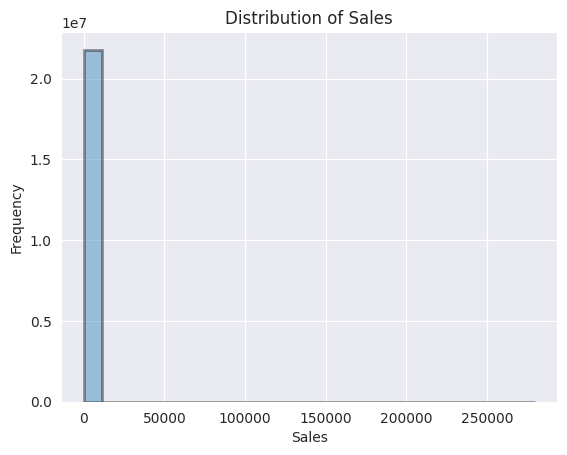

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sales' is the column you want to visualize
column_name = 'Sales'

# Create a distribution plot
sns.distplot(df[column_name], bins=25, kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

# Set plot labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()


#identify and explore potential outliers in the 'Sales' column,

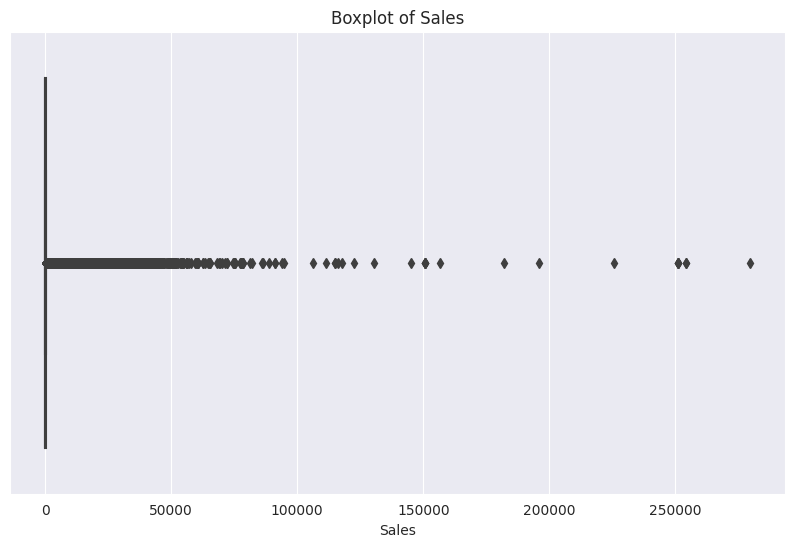

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'Sales' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])

# Set plot labels
plt.title('Boxplot of Sales')
plt.xlabel('Sales')

# Show the plot
plt.show()


#The Interquartile Range (IQR) and uses it to define lower and upper bounds for potential outliers

In [ ]:
import numpy as np

# Calculate the Interquartile Range (IQR)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Display potential outliers
print("Potential Outliers:")
print(outliers[['invoice_and_item_number', 'date', 'Store Name', 'Sales']])


Potential Outliers:
         invoice_and_item_number        date  \
0                INV-45394200041  2022-03-08   
8                INV-22905700020  2019-10-30   
10                  S15395800014  2013-10-29   
11                  S17901700024  2014-03-17   
18               INV-46662900038  2022-04-20   
...                          ...         ...   
27693447         INV-30923500001  2020-10-12   
27693881         INV-35950300006  2021-04-20   
27694299         INV-35196600001  2021-03-22   
27700150         INV-48345700001  2022-06-15   
27703585         INV-28373900068  2020-06-30   

                                     Store Name   Sales  
0                               DOWNTOWN LIQUOR  846.24  
8         HY-VEE FOOD STORE #2 / COUNCIL BLUFFS  327.60  
10                  WAL-MART 1415 / SPIRIT LAKE  430.32  
11                    HY-VEE #1044 / BURLINGTON  856.80  
18            SAM'S CLUB 6344 / WINDSOR HEIGHTS  943.92  
...                                         ...     ...

## Temporal Variations: The identified outliers span multiple years (e.g., 2013 to 2022), indicating that these high-value transactions occur at different times and are not limited to a specific period.

## Store-Specific Analysis: The 'Store Name' information allows further investigation into specific stores that have high sales values.

In [ ]:
# Check the mean
df['Sales'].mean()

141.18014586093335

In [ ]:
# Check the median
df['Sales'].median()

74.16

In [ ]:
# Check the max
df['Sales'].max()

279557.28

# 3. Data prep for regression analysis

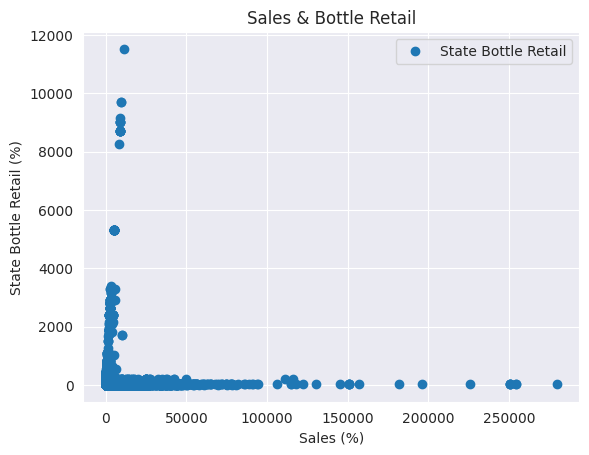

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for 'Sales' and 'Store Name'
df.plot(x='Sales', y='State Bottle Retail', style='o')

# Title and axis labels
plt.title('Sales & Bottle Retail')
plt.xlabel('Sales (%)')
plt.ylabel('State Bottle Retail (%)')

# Display the plot
plt.show()


In [ ]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['State Bottle Retail'].values.reshape(-1,1)

In [ ]:
X

array([[846.24],
       [216.  ],
       [ 80.64],
       ...,
       [ 18.42],
       [ 29.98],
       [ 19.14]])

In [ ]:
y

array([[17.63],
       [ 4.5 ],
       [ 3.36],
       ...,
       [ 9.21],
       [14.99],
       [ 9.57]])

In [ ]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predicted = regression.predict(X_test)

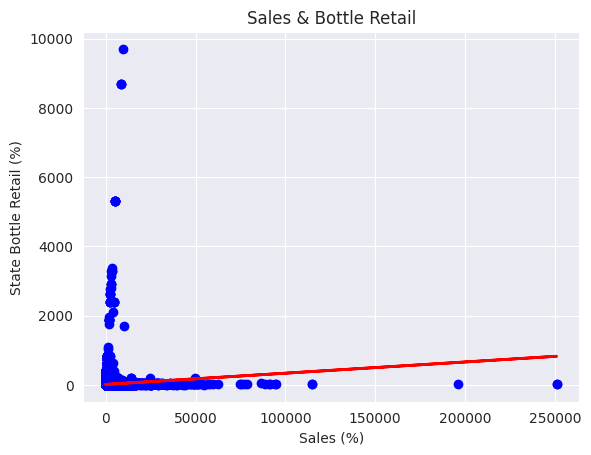

In [ ]:
# Create a a plot that shows the regression line from the model on the test set.

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_predicted, color='red', linewidth=2)
plt.title('Sales & Bottle Retail')
plt.xlabel('Sales (%)')
plt.ylabel('State Bottle Retail (%)')
plt.show()

In [ ]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [ ]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00323916]]
Mean squared error:  246.65543771872285
R2 score:  0.010277159900989874


**Slope (Coefficient):**

The slope represents the change in the dependent variable (Sales) for a one-unit change in the independent variable (the variable used to predict Sales). In this case, the slope is 0.00323916. A positive slope suggests a positive relationship, but the magnitude is small.

**Mean Squared Error (MSE):**
MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit of the model to the data. In this case, MSE is 246.65543771872285, and its interpretation depends on the scale of the dependent variable (Sales).

**R2 Score:**
R2 (coefficient of determination) is a measure of how well the independent variable(s) explain the variance in the dependent variable. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the R2 score is 0.010277159900989874, suggesting that the model explains only a small proportion of the variance in Sales.

**Interpretation:**

The positive slope suggests a positive but small relationship between the independent variable(s) and Sales.
The MSE is relatively high, indicating that the model has a significant amount of error in its predictions.
The low R2 score indicates that the model does not explain much of the variability in Sales.


In [ ]:
y_predicted

array([[14.94864124],
       [14.9530141 ],
       [16.19199186],
       ...,
       [15.11108499],
       [14.95754892],
       [14.945726  ]])

In [ ]:
# Create a dataframe comparing the actual and predicted values of y.

df_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_predicted

,Actual,Predicted
0,21.15,14.948641
1,11.25,14.953014
2,22.50,16.191992
3,23.36,15.107133
4,11.81,15.339186
...,...,...
6540431,13.38,15.140173
6540432,12.30,15.119183
6540433,7.13,15.111085
6540434,11.95,14.957549


from matplotlib import pyplot as plt
df_predicted['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_predicted['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_predicted.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_predicted['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_predicted['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

# Create a dataframe comparing the actual and predicted values of y.

In [ ]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [ ]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [ ]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00323916]]
Mean squared error:  266.9536919964116
R2 score:  0.009868947686206275


Text(0.5, 1.0, 'Sales & Bottle Retail')

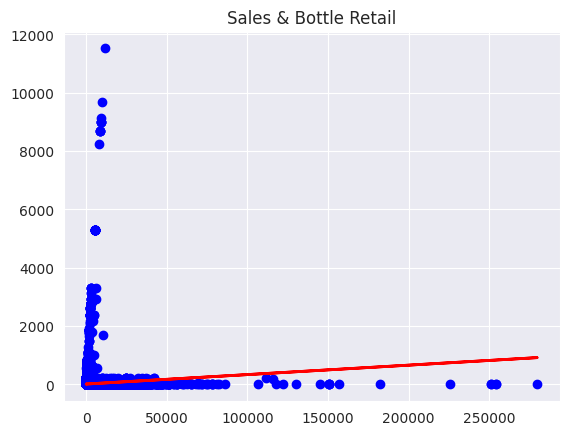

In [ ]:
# Visualizing the training set results.

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_predicted_train, color='red', linewidth=2)
plt.title('Sales & Bottle Retail')    # Title
plt.xlabel('Sales (%)')
plt.ylabel('State Bottle Retail (%)')    # Y-axis label
plt.show()


# *6.5* Machine Learning : Clustering

## Locating Any Remaining Categorical Columns in the Dataset

In [42]:
# Print the list of categorical columns

df.select_dtypes(include=['object']).columns


Index(['invoice_and_item_number', 'store_number', 'Store Name', 'address',
       'city', 'zip_code', 'store_location', 'County Id', 'county', 'category',
       'category_name', 'vendor_number', 'vendor_name', 'item_number',
       'item_description'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for clustering
df_clustering_numeric = df.select_dtypes(include=['number'])

# Standardize numeric data
scaler = StandardScaler()
df_standardized_numeric = pd.DataFrame(scaler.fit_transform(df_clustering_numeric), columns=df_clustering_numeric.columns)

# Concatenate standardized numeric data with non-numeric data (like datetime columns)
df_standardized = pd.concat([df[['date', 'vendor_name', 'Bottles Sold']], df_standardized_numeric], axis=1)

# Print the list of standardized columns
df_standardized.columns



Index(['date', 'vendor_name', 'Bottles Sold', 'pack', 'bottle_volume_ml',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sales',
       'volume_sold_liters', 'volume_sold_gallons', 'Profit'],
      dtype='object')

# The elbow technique

In [47]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


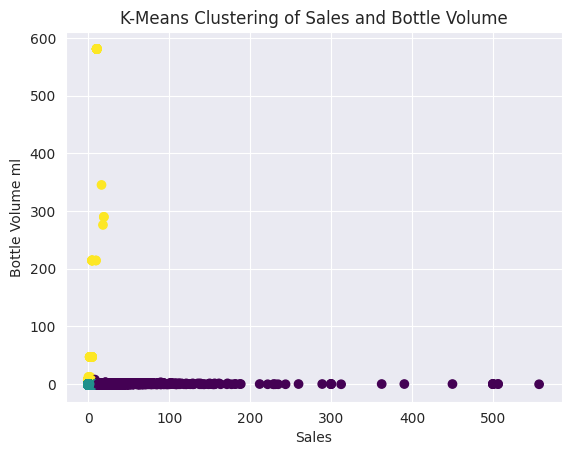

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for clustering
selected_columns = ['Sales', 'bottle_volume_ml']
df_selected = df[selected_columns]

# Standardize data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# Fit k-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
df_standardized['cluster'] = kmeans.fit_predict(df_standardized)

# Visualize the clusters (for example, with scatter plot)
plt.scatter(df_standardized['Sales'], df_standardized['bottle_volume_ml'], c=df_standardized['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Sales and Bottle Volume')
plt.xlabel('Sales')
plt.ylabel('Bottle Volume ml')
plt.show()


# 3. k-means clustering

In [53]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [55]:

# Fit the model to the data.

kmeans.fit(df_standardized)
selected_columns = ['Sales', 'bottle_volume_ml']  # Add other columns as needed, excluding 'date'
df_selected = df[selected_columns]

kmeans.fit(df_selected)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [57]:
df_selected['clusters'] = kmeans.fit_predict(df_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-57-8f1df71d998e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['clusters'] = kmeans.fit_predict(df_selected)


In [58]:
df_selected.head()

,Sales,bottle_volume_ml,clusters
0,7020.00,1000,2
1,7.52,200,0
2,35.28,600,0
3,364.80,1000,0
4,163.20,200,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bottle_volume_ml'].plot(kind='hist', bins=20, title='bottle_volume_ml')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['clusters'].plot(kind='hist', bins=20, title='clusters')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Sales', y='bottle_volume_ml', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bottle_volume_ml', y='clusters', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bottle_volume_ml']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bottle_volume_ml')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['clusters']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('clusters')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['bottle_volume_ml'].plot(kind='line', figsize=(8, 4), title='bottle_volume_ml')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['clusters'].plot(kind='line', figsize=(8, 4), title='clusters')
plt.gca().spines[['top', 'right']].set_visible(False)

In [59]:
df_selected['clusters'].value_counts()

0    17355623
2     4445801
1          27
Name: clusters, dtype: int64

In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['bottle_volume_ml', 'Sales']]

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster_labels'] = kmeans.labels_

# Group by the 'cluster_labels' column and calculate descriptive statistics
cluster_statistics = df.groupby('cluster_labels').describe()

# Print the descriptive statistics
print(cluster_statistics)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                      pack                                                     \
                     count       mean       std  min   25%   50%   75%    max   
cluster_labels                                                                  
0               17355623.0  13.831741  7.820804  1.0  12.0  12.0  12.0  120.0   
1                     27.0        1.0       0.0  1.0   1.0   1.0   1.0    1.0   
2                4445801.0   5.935194  1.885292  1.0   6.0   6.0   6.0  336.0   

               bottle_volume_ml               ... volume_sold_gallons  \
                          count         mean  ...                 75%   
cluster_labels                                ...                       
0                    17355623.0   669.137667  ...                2.38   
1                          27.0     351000.0  ...               99.86   
2                     4445801.0  1772.316752  ...                2.77   

                             Profit                                    \
 